In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#Wordcloud imports
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [10]:
year2018 = pd.read_csv("../datasets/2018.csv", encoding="utf-8", sep=";")
year2019 = pd.read_csv("../datasets/2019.csv", encoding="utf-8", sep=";")
year2020 = pd.read_csv("../datasets/2020.csv", encoding="utf-8", sep=";")
year2021 = pd.read_csv("../datasets/2021.csv", encoding="utf-8", sep=";")
year2022 = pd.read_csv("../datasets/2022.csv", encoding="utf-8", sep=";")

csv_list = [year2018, year2019, year2020, year2021, year2022]


In [11]:
filter_string = "beredskap"

def isolate(df, filter_string):
    new_df = df[df["tittel"].str.contains(filter_string) | df["tittel"].str.contains(filter_string.title())| df["tittel"].str.contains(filter_string.upper())]
    return new_df[['doffin_id', 'tittel']].copy()


ber_year2018 = isolate(year2018, filter_string)
ber_year2019 = isolate(year2019, filter_string)
ber_year2020 = isolate(year2020, filter_string)
ber_year2021 = isolate(year2021, filter_string)
ber_year2022 = isolate(year2022, filter_string)

ber_csv_list = [ber_year2018, ber_year2019, ber_year2020, ber_year2021, ber_year2022]

In [12]:
#making lists of words in title

def generate_word_lists(df):
    list = []
    for index, row in df.iterrows(): 
        title_string = row["tittel"].lower()
        list.extend(title_string.split())
    return list
        
word_list_2018 = generate_word_lists(ber_year2018)
word_list_2019 = generate_word_lists(ber_year2019)
word_list_2020 = generate_word_lists(ber_year2020)
word_list_2021 = generate_word_lists(ber_year2021)
word_list_2022 = generate_word_lists(ber_year2022)

total_word_list = word_list_2018 + word_list_2019 + word_list_2020 + word_list_2021 + word_list_2022

def clean_list(word_list, excluded_words_list):
    for word in word_list:
        if word in excluded_words_list:
            word_list.remove(word)

In [13]:
#Clean word list for common words

excluded_words = [
    "og",
    "med",
    "av",
    "-",
    "til",
    "for",
    "ved",
    "2",
    "1",
    "i",
    "p�",
    "om",
    "innen",
    "kj�p" 
]

clean_list(total_word_list, excluded_words)

In [14]:
def count(elements, dictionary):
    # check if each word has '.' at its last charachter. If so then ignore '.'
    if elements[-1] == '.':
        elements = elements[0:len(elements) - 1]
 
    # if there exists a key as "elements" then simply
    # increase its value.
    if elements in dictionary:
        dictionary[elements] += 1
 
    # if the dictionary does not have the key as "elements"
    # then create a key "elements" and assign its value to 1.
    else:
        dictionary.update({elements: 1})
        

def get_word_frequency(word_list, dictionary):
     
    for elements in word_list:
        count(elements, dictionary)
    
    sorted_dictionary = sorted(dictionary.items(), key=lambda x:x[1], reverse=True)
    converted_dictionary = dict(sorted_dictionary)
    
    # print the keys and its corresponding values.
    for allKeys in converted_dictionary:
        print ("Frekvens for ordet: ", allKeys, end = " ")
        print (":", end = " ")
        print (dictionary[allKeys], end = " ")
        print()

In [15]:
dictionary = {}

get_word_frequency(total_word_list, dictionary)


Frekvens for ordet:  beredskap : 72 
Frekvens for ordet:  beredskapslager : 37 
Frekvens for ordet:  rammeavtale : 35 
Frekvens for ordet:  nasjonalt : 30 
Frekvens for ordet:  anskaffelse : 22 
Frekvens for ordet:  sikkerhet : 18 
Frekvens for ordet:  kommune : 12 
Frekvens for ordet:  kj�p : 12 
Frekvens for ordet:  drift, : 11 
Frekvens for ordet:  vedlikehold : 11 
Frekvens for ordet:  service : 11 
Frekvens for ordet:  konsulenttjenester : 10 
Frekvens for ordet:  beredskapshotell : 10 
Frekvens for ordet:  beredskapssenter : 9 
Frekvens for ordet:  beredskapsavtale : 9 
Frekvens for ordet:  bistand : 8 
Frekvens for ordet:  sikkerhets- : 8 
Frekvens for ordet:  beredskap, : 7 
Frekvens for ordet:  beredskaps- : 7 
Frekvens for ordet:  konsulentbistand : 7 
Frekvens for ordet:  nasjonale : 7 
Frekvens for ordet:  drift : 7 
Frekvens for ordet:  rammeavtaler : 6 
Frekvens for ordet:  nytt : 6 
Frekvens for ordet:  intensjonskunngj�ring : 6 
Frekvens for ordet:  politiets : 6 
Frekv

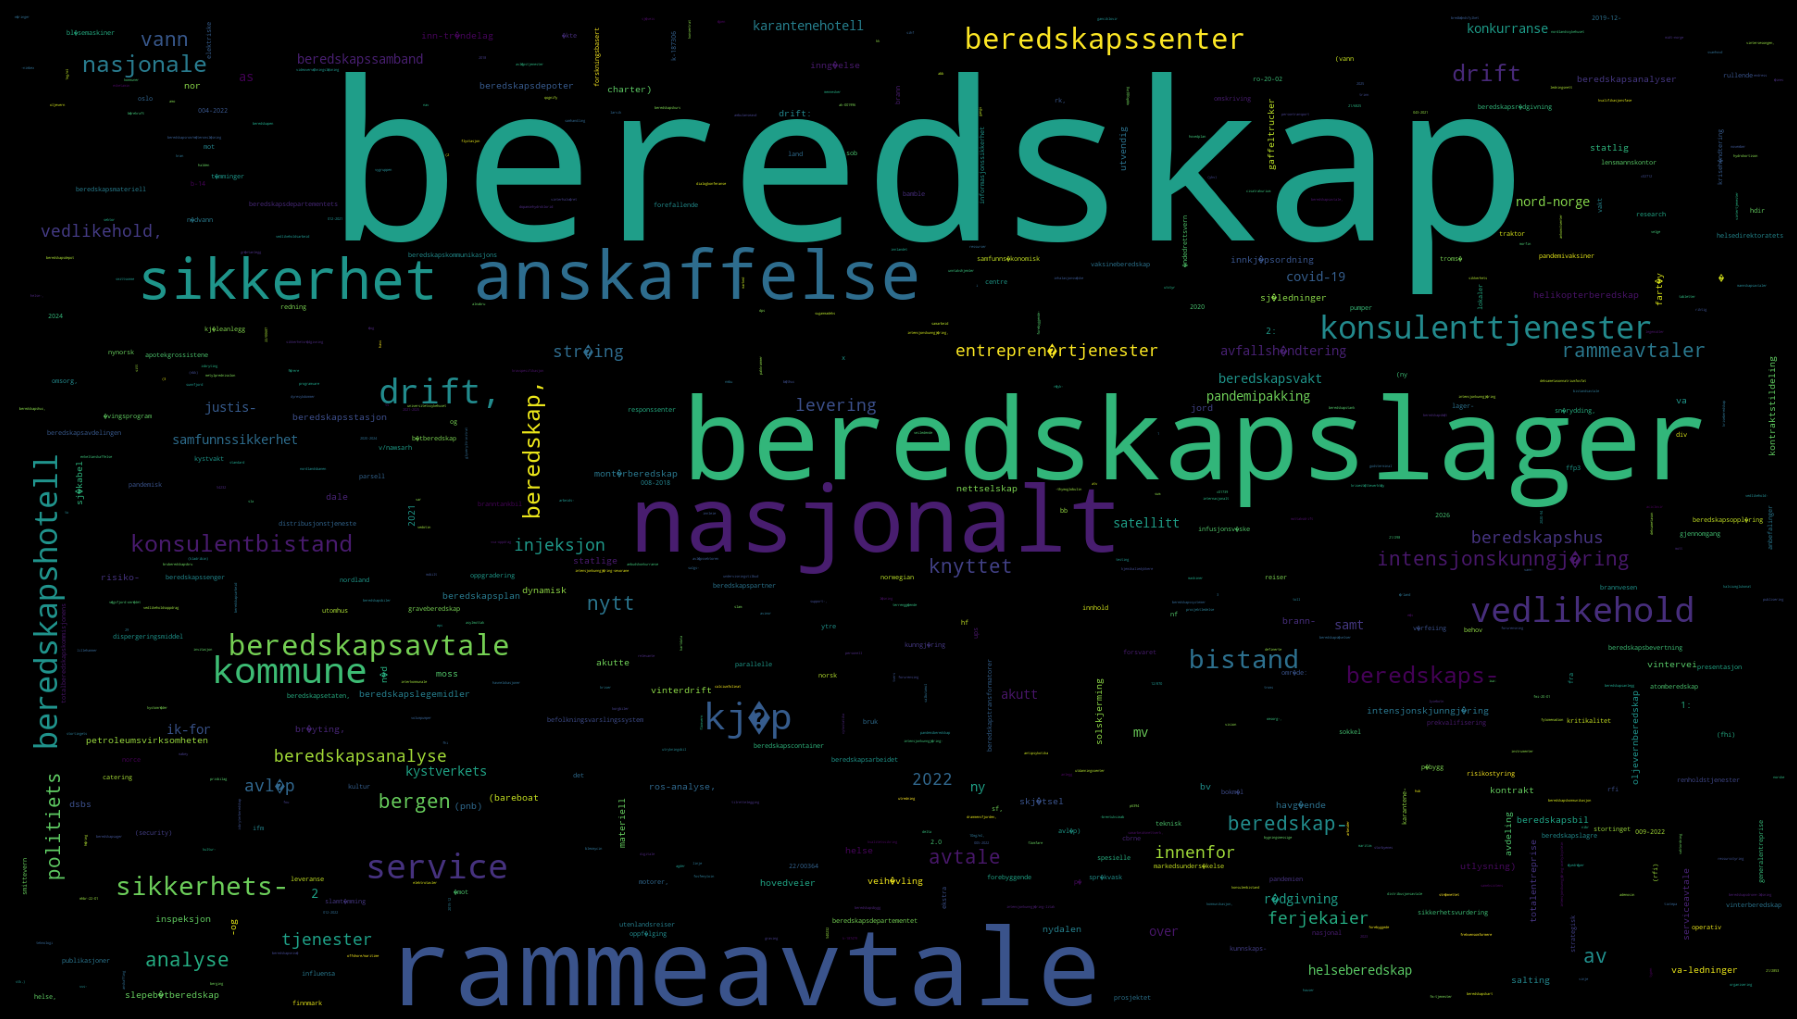

In [16]:
wordcloud = WordCloud(width=1920,height=1080, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(dictionary)


plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()